In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!gdown  1l53Fgkg1G1ekCxxgaDQ00EXrnSMTeJj-

Downloading...
From: https://drive.google.com/uc?id=1l53Fgkg1G1ekCxxgaDQ00EXrnSMTeJj-
To: /content/sample_data.csv
100% 32.5k/32.5k [00:00<00:00, 39.5MB/s]


In [ ]:
sample_data = pd.read_csv('sample_data.csv')

In [ ]:
sample_data.head()

,Gender,Age_less_35,JobRole,Attrition
0,Male,True,Laboratory Technician,0
1,Male,False,Sales Executive,1
2,Male,True,Sales Representative,1
3,Female,False,Healthcare Representative,0
4,Male,True,Sales Executive,0


In [ ]:
def entropy(Y):
  p = Y.value_counts()/len(Y)

  en= np.sum(-p*np.log2(p + 1e-9))

  return en

In [ ]:
entropy(sample_data['Attrition'])

0.6554120789588516

In [ ]:
sample_data['Attrition'].value_counts()

0    831
1    169
Name: Attrition, dtype: int64

In [ ]:
def calculate_weighted_entropy(feature, Y):
  categories = feature.unique()

  weighted_en = 0.0

  for category in categories:
    
    Y_category = Y[feature == category]
    
    weight  = len(Y_category)/ len(Y)

    en_category = entropy(Y_category)

    weighted_en += (weight*en_category)

  return weighted_en

In [ ]:
def information_gain(feature, Y):
  parent_ent = entropy(Y)
  child_ent = calculate_weighted_entropy(feature, Y)

  return (parent_ent - child_ent)

In [ ]:
calculate_weighted_entropy(sample_data['Age_less_35'], sample_data['Attrition'])

0.6339490140391142

In [ ]:
information_gain(sample_data['Age_less_35'], sample_data['Attrition'])

0.021463064919737374

In [ ]:
information_gain(sample_data['Gender'], sample_data['Attrition'])

3.2976904443815513e-06

In [ ]:
information_gain(sample_data['JobRole'], sample_data['Attrition'])

0.05429906805101914

In [1]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 38.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 73.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 21.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 15.0MB/s]


In [2]:
import pickle

# Load data 
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_sm = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_sm = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [15]:
y_sm.value_counts()

0    924
1    924
Name: Attrition, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_clf = DecisionTreeClassifier()

In [21]:
tree_clf.fit(X_sm, y_sm)

DecisionTreeClassifier()

In [22]:
y_pred = tree_clf.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 1])

In [23]:
print("Training acc:", tree_clf.score(X_sm, y_sm) )
print("Testing acc:", tree_clf.score(X_test, y_test) )

Training acc: 1.0
Testing acc: 0.7554347826086957


In [12]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(tree_clf, X_sm, y_sm, scoring = 'accuracy', cv=10)

In [14]:
# validation accuracy
accuracies.mean()

0.8268889541715628

In [24]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_sm.columns)

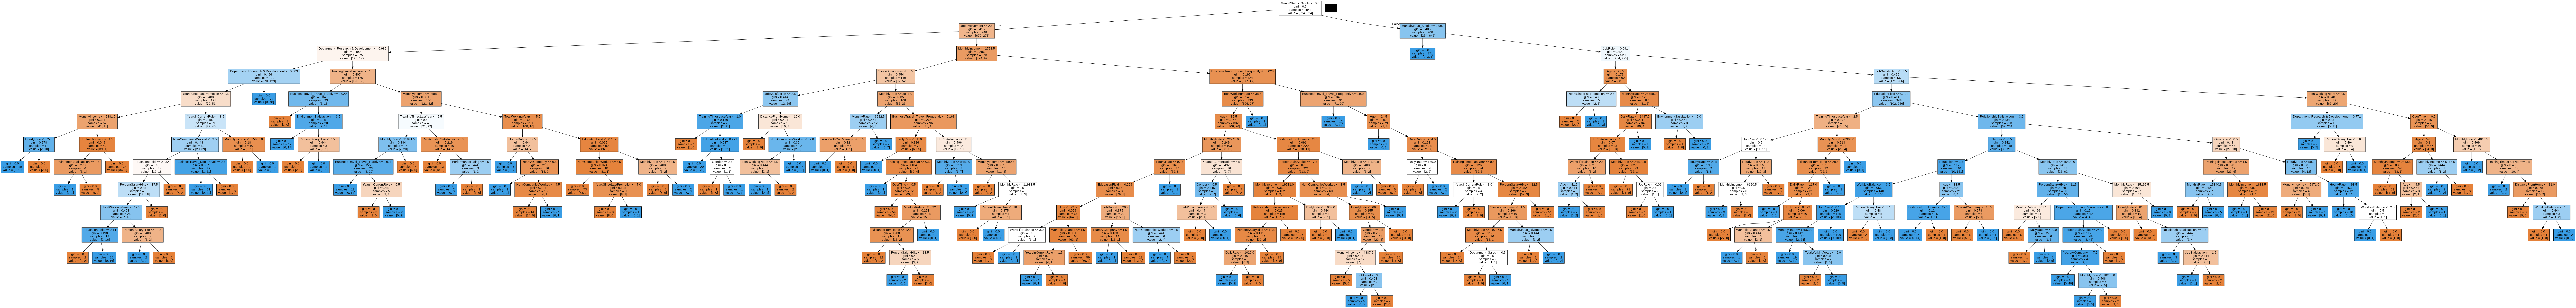

In [25]:
tree_clf = tree_clf.fit(X_sm, y_sm)

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [26]:
tree_clf2 = DecisionTreeClassifier(max_depth = 3)

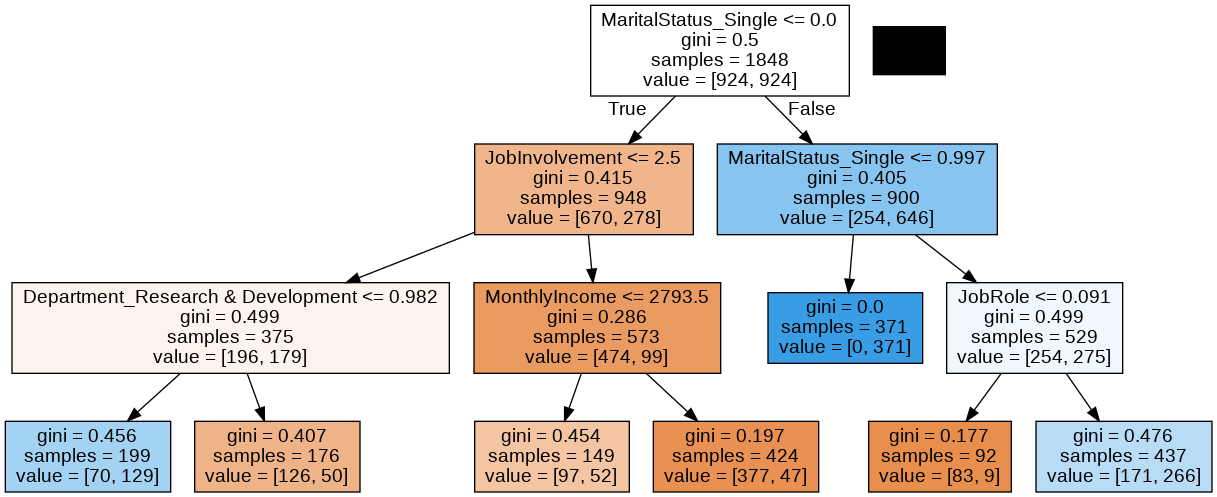

In [27]:
tree_clf2 = tree_clf2.fit(X_sm, y_sm)

dot_data = StringIO()
export_graphviz(tree_clf2, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [29]:
depths = [2, 3, 5, 6,7 ,8, 9, 10, 12, 15, 20]

for d in depths:
  clf = DecisionTreeClassifier(max_depth = d)
  clf.fit(X_sm, y_sm)

  accuracies = cross_val_score(clf, X_sm, y_sm, scoring = 'accuracy', cv=10)
  print(f"Depth {d} - Train accuracy: {clf.score(X_sm, y_sm).round(2)} ,   Val accuracy: {accuracies.mean().round(2)}")

Depth 2 - Train accuracy: 0.71 ,   Val accuracy: 0.71
Depth 3 - Train accuracy: 0.78 ,   Val accuracy: 0.75
Depth 5 - Train accuracy: 0.87 ,   Val accuracy: 0.83
Depth 6 - Train accuracy: 0.9 ,   Val accuracy: 0.85
Depth 7 - Train accuracy: 0.93 ,   Val accuracy: 0.84
Depth 8 - Train accuracy: 0.95 ,   Val accuracy: 0.84
Depth 9 - Train accuracy: 0.97 ,   Val accuracy: 0.84
Depth 10 - Train accuracy: 0.99 ,   Val accuracy: 0.83
Depth 12 - Train accuracy: 1.0 ,   Val accuracy: 0.83
Depth 15 - Train accuracy: 1.0 ,   Val accuracy: 0.83
Depth 20 - Train accuracy: 1.0 ,   Val accuracy: 0.82


In [30]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_sm, y_sm)

DecisionTreeClassifier(max_depth=6)

In [31]:
print("Training acc:", model.score(X_sm, y_sm) )
print("Testing acc:", model.score(X_test, y_test) )

Training acc: 0.9025974025974026
Testing acc: 0.8152173913043478


In [32]:
## Confusion Matrix

In [ ]:
# How the performance of a Decision Tree will be affected if we tend to increase maximum number of pure leaf nodes?